In [ ]:
!pip install easyocr
!pip install imutils

     |████████████████████████████████| 63.6 MB 20 kB/s 
     |████████████████████████████████| 47.6 MB 30 kB/s 


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

In [ ]:
from google.colab import files
files.upload()

Saving Pic4.jpg to Pic4.jpg


{'Pic4.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\n\x06\x07\x14\x14\x13\x16\x14\x13\x13\x16\x18\x16\x19\x19\x16\x19\x1a\x1a\x19\x19\x1a\x1a\x1c\x1a\x19\x1a\x19\x1a\x1c\x1c\x1a\x1a\x1a!\x1f+"\x1a\x1d(\x1f\x16\x18#4#(-.113\x19!7<70;+01.\x01\x0b\x0b\x0b\x0f\x0e\x0f\x1d\x11\x11\x1d4("(00001200;03020000000020320200002009.00200000000000\xff\xc0\x00\x11\x08\x00\xb7\x01\x13\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x01\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00\x01\x02\x04\x06\x03\x07\xff\xc4\x00K\x10\x00\x02\x01\x02\x03\x04\x08\x02\x05\x08\t\x02\x05\x05\x00\x00\x01\x02\x11\x00\x03\x04\x12!\x051AQ\x06\x13"aq\x81\x91\xa12\xb1\x14R\xc1\xd1\xf0#Bbr\x82\x92\xb2\xe1\x07\x153Sc\x93\xa2\xd2\xf1C\xc2DTs\x94\xd3\x16$%4\x83\xff\xc4\x00\x1a\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x01\x02\x04\x05\x06\xff\xc4\x003\x11\x00\x02\x01\x02\x04\x04\x05\x03\x03\x03\x05\x00\x00\x00\x00\x

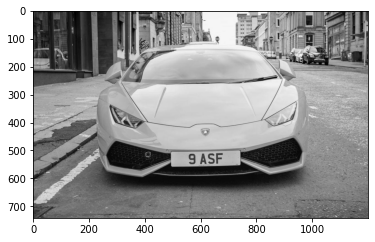

In [ ]:
img = cv2.imread('Pic7.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

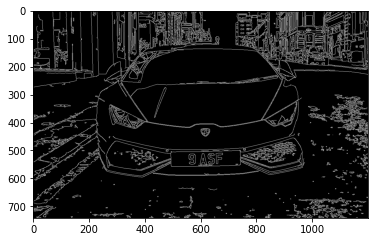

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [ ]:
location

array([[[742, 504]],

       [[739, 553]],

       [[494, 554]],

       [[496, 506]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

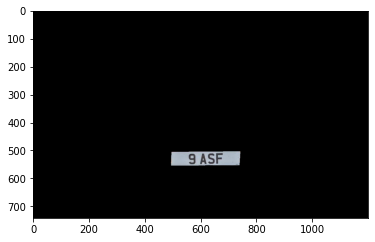

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

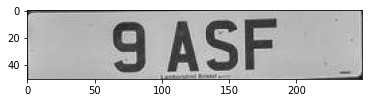

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[56, 0], [194, 0], [194, 51], [56, 51]], '9 ASF', 0.9572352787031531)]

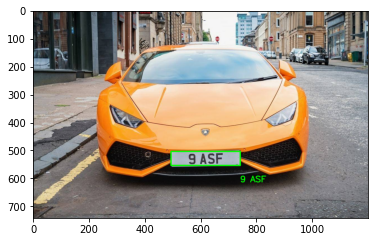

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))